# Exam 2
Kieran Fitzpatrick

This is a mini project on the use of the Monte Carlo scheme to price exotic options to
be completed using Python.

#### Task: 
Use the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$ for the appropriate form of payoff, to consider Asian and lookback options. Use the Euler-Maruyama scheme for initially simulating the underlying stock price.

$$
V(S,t) = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}} [\text{Payoff}(S_T)]
$$

## 1. Introduction 
The goal is to calculate the option price for Asian and lookback options using the risk-neutral pricing framework. We'll use the Euler-Maruyama scheme for simulating the underlying stock price. 

In the universe of financial derivatives, options are key due to their versatility and utility of strategic possibilities they offer to market participants to both hedge and speculate. Among the various types of options, exotic options — like Asian and lookback options — offer unique payoffs based on the path of the underlying asset's price. Unlike plain vanilla options, whose payoffs are a function of the underlying asset's price at expiration. Path-dependent contracts like Asian and lookback contracts, have payoffs, and therefore values, that depend on the history of the asset price path. Asian and lookback options are considered strong-dependednt options as they have payoffs that depend on some property of the assetprice path in addition to the value of the underlying at the present moment in time; in the equity option language, we cannot write the value as V (S, t).


Given the complexity of these exotic options Monte-Carlo is a popular numerical method for pricing. In this approach, the underlying asset's price path is simulated multiple times, and the corresponding payoffs are averaged and discounted to the present. The Euler-Maruyama scheme is often employed in these simulations to discretize the continuous paths of asset prices modeled by Geometric Brownian Motion (GBM). 

This project focuses on utilizing Monte Carlo methods to estimate the prices of Asian and lookback options. By exploring the nuanced pricing mechanisms underpinning these financial instruments, we aim to provide a comprehensive analysis that can in understanding and leveraging the unique advantages offered by Asian and lookback options.



##### Asian Option:
The Asian option has a payoff that depends on the average value of the underlying asset from inception to expiry. This averaging feature can mitigate the impact of volatility and short-term market manipulation, potentially offering a more cost-effective hedging instrument. The average used in the calculation of the option’s payoff can be defined in many different ways. It can be an arithmetic average or a geometric average, for example.

##### Lookback Options:
Lookback options, on the other hand, offer the most favourable exercise price within the option's life. For a call, this means the payoff is based on the maximum price reached by the underlying asset, and for a put, it's based on the minimum price. This feature ensures that the holder always exercises the option at the most advantageous price, making lookbacks particularly valuable in volatile markets.

Both Asian and lookback options are priced using the risk-neutral pricing method, which involves calculating the expected value of their unique payoffs under the risk-neutral measure — a probabilistic framework that assumes investors are indifferent to risk. This expected value is then discounted at the risk-free interest rate to yield the present value, or price, of the option.




## Stock Price Simulation

Monte Carlo methods are any process that consumes random numbers. These are part of computational algorithms which are based on random sampling to obtain numerical results. Monte Carlo methods are proved to be a very valuable and flexible computational tool in finance and is one of the most widely used methods for optimization and numerical integration problems. These methods are widely used in high dimensional problems; pricing exotics and complex derivatives where closed form solutions are not directly available. Banks and other financial institutions use it, among others, for pricing and risk management purposes. As a numerical method it is perhaps the most flexible and powerful one in finance (Python
for Finance, 2nd Ed., 2015).

##### Relationship between derivative values and simulations:
Referring to our lecture notes, theory says: The fair value of an option is the present value of the expected payoff at expiry under a risk-neutral random walk for
the underlying.

Following Black-Scholes-Merton where the underlying follows under risk neutrality, a geometric Brownian motion with a stochastic differential
equation (SDE) is given as:

$
\ dS_t = rS_t \, dt + \sigma S_t  dW_t \quad 
$

where $r_t$ is the short rate at time $t$, and $\sigma_t$ is the implied volatility at time $t$. $W_t$ is the Wiener process. (Glasserman , 2004,Monte Carlo Methods in Financial Engineering )

Price paths are simulated using a discrete version of the stochastic differential equation for S. The Euler-Maruyama method is a numerical technique used for simulating stochastic differential equations, such as the Geometric Brownian Motion above which is commonly used to model stock prices. 


The Euler-Maruyama methods for the GBM gives

$
\delta S = rS\delta t + \sigma S \sqrt{\delta t}\phi
$

where $\delta t$ refers to as the time step in discrete time. And $\phi$ is a standard normal random number. That is, $\phi \sim \mathcal{N}(0, 1)$. The $\phi$ term introduces the randomness into the system, simulating the random walk behavior of the stock price.This method has an error of O(δt). (P Wilmott (2007), Paul Wilmott introduces Quantitative Finance) 

The Euler-Maruyama scheme is a simple and widely-used method for numerically approximating solutions to stochastic differential equations. By discretizing the time interval, this scheme allows us to simulate GBM paths step by step. At each step, we update the GBM path by adding a Wiener increment, which is directly related to the square root of the time step.


In [1]:
# Generate Price Paths

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set max row to 300
pd.set_option('display.max_rows', 300)

In [2]:
# Given parameters
S0 = 100  # Today's stock price
E = 100   # Strike price
T = 1     # Time to expiry (T - t)
sigma = 0.20  # Volatility
r = 0.05  # Risk-free interest rate
dt = 1/252  # Time increment (daily steps)
ts = 252 # Number of time steps


In [3]:
#Code for the simulation of the stock price paths using the Euler-Maruyama method based on labs

def simulate_euler_method(S0, E, r, sigma, T, dt, num_paths):

    np.random.seed(2024)  # For reproducibility
    num_steps = ts  # Number of time steps
    S = np.zeros((ts + 1, num_paths))  # Initialize stock price paths
    S[0] = S0  # Set initial stock price
    
    # Simulate each path
    for t in range(ts):
        W = np.random.standard_normal(num_paths)  # Generate pseudo random numbers
        S[t + 1] = S[t] * (1 + r * dt + sigma * np.sqrt(dt) * W)  # Calculate the stock price at next step
        
    return S

 #store output of function.
simulated_euler_paths = simulate_euler_method(S0, E, r, sigma, T, dt, 10000)

In [4]:
simulated_euler_paths.shape

(253, 10000)

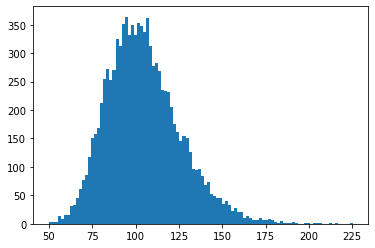

In [5]:
# Plot the histogram of outcomes. 
plt.hist(simulated_euler_paths[-1], bins=100);

The histogram represents the distribution of possible stock prices at expiration, according to the Monte Carlo simulation.

#### QQ Plot

Below is a QQ plot for the generated random numbers against the standard normal distribution. The points lie reasonably close to the line, indicating that the random numbers are well-aligned with a standard normal distribution, which is the expected distribution for the increments of a Wiener process used in the Euler-Maruyama method for option pricing simulations.

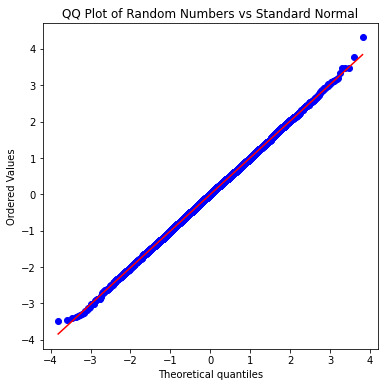

In [6]:
import scipy.stats as stats

# Generate QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(np.random.standard_normal(10000), dist="norm", plot=plt)
plt.title('QQ Plot of Random Numbers vs Standard Normal')
plt.show()


#### Plot of simulations

First 1,000 used only for plot.

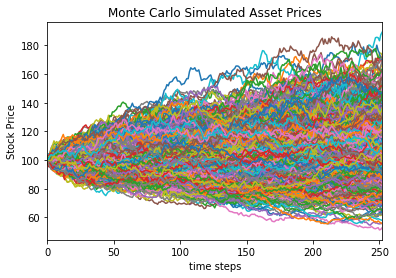

In [7]:
# Plot initial 1000 simulated path 
plt.plot(simulated_euler_paths[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulated Asset Prices');

We now have a method using the Euler-Maruyama method to create random paths for our underlying asset. Avove plot shows Each path represents a potential future scenario for the stock price evolution until the option's maturity. With these paths, we can proceed to the option pricing stage. Once we have the payoffs for each path, we can discount them to present value using the risk-free rate. The final step would be to take the average of these discounted payoffs, which would give us the estimated price for the option.

### Asian Option
In general, the expected value of the discounted payoff under the risk neutral density $Q$ is

$V(S,t) = e^{-r(T-t)} \mathbb{E}^Q[\text{Payoff}(S_T)]$




##### Payoff Scheme
The payoff of the Asian option varies on option type (Call vs. Put), averaging method (Arithmetic vs. Geometric sampling) and strike scheme (Fixed vs. Floating strike) and so on. The most commonly used variation of the Asian option in financial markets tends to be the arithmetic average, fixed strike Asian option. This type of option is favored because its payoff calculation is straightforward and easier to understand compared to geometric averaging.

##### Averaging Method

Consider a regular fixed strike Asian option. An Asian call option pays out
$$ C(T) = \text{max}(A(0, T) - K, 0) $$
where \( A(0, T) \) is the averaged underlying price over the period \( [0, T] \). (Glasserman , 2004,Monte Carlo Methods in Financial Engineering )

Under arithmetic averaging scheme, the continuous time formula of the average is
$$ A(0, T) = \frac{1}{T} \int_{0}^{T} S(t) \, dt $$

In discrete time, the arithmetic average is
$$ A(0, T) = \frac{1}{N + 1} \sum_{i=0}^{N} S(t_i), \quad t_i = \frac{i \cdot T}{N} $$

Under geometric averaging scheme, the continuous time formula of the average is
$$ A(0, T) = \frac{1}{T} \int_{0}^{T} \ln(S(t)) \, dt $$

In discrete time, the geometric average is
$$ A(0, T) = prod_{i=0}^{N+1} S(t_i)^{\frac{1}{N+1}}, where t_i = \frac{i \cdot T}{N} $$

 Payoff Functions:
   - Call Option: $$ C(T) = \max(A(0, T) - K, 0) $$
   - Put Option: $$ P(T) = \max(K - A(0, T), 0) $$

Below is a plot of the stock price dynamics and its arithmetic and geometric averages. The plot shows a single stock price simulation and its arithmetic (orange) and geometric (green)averages. The Asian option has the feature that its final payoff is related to these averages. In practice, the arithmetic average is more commonly used for pricing Asian options because it aligns more closely with the actual payout calculations. The geometric average is less sensitive to extreme values and tends to be lower than the arithmetic average, as seen in the plot.

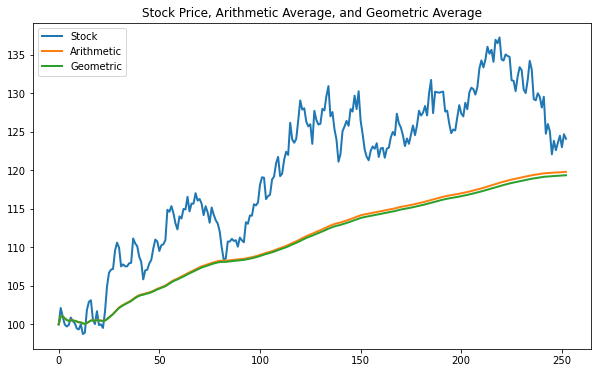

In [8]:
# One simulated path for demonstration
single_path = simulated_euler_paths[:, 0]

# rolling arithmetic average
arithmetic_averages = np.cumsum(single_path) / np.arange(1, ts + 2)

# rolling geometric average
geometric_averages = np.exp(np.cumsum(np.log(single_path)) / np.arange(1, ts + 2))

# Plot the stock price and the two averages
plt.figure(figsize=(10, 6))
plt.plot(single_path, label='Stock', lw=2)
plt.plot(arithmetic_averages, label='Arithmetic', lw=2)
plt.plot(geometric_averages, label='Geometric', lw=2)
plt.title('Stock Price, Arithmetic Average, and Geometric Average')
plt.legend()
plt.show()


#### Fixed Strike Asian Option

##### Arithmetric Mean

In [9]:
# Function to calculate arithmetic average option payoff based on labs
def asian_option_arithmetic(simulated_euler_paths, r, T, E):

    A = simulated_euler_paths.mean(axis=0) # arithmrtric average 
    
    #calculate the discounted value of the expeced payoff
    asian_call_payoff = np.maximum(0, A - E)
    asian_put_payoff = np.maximum(0, E - A)
    asian_call = np.exp(-r * T) * np.mean(asian_call_payoff)
    asian_put = np.exp(-r * T) * np.mean(asian_put_payoff)
    return asian_call, asian_put

##### Geometric Mean

In [10]:
# Function to calculate geometric average option payoff
def asian_option_geometric(simulated_euler_paths, r, T, E):


    log_prices = np.log(simulated_euler_paths)
    log_mean = log_prices.mean(axis=0) 
    A = np.exp(log_mean) # geometric average
    
    #calculate the discounted value of the expeced payoff
    asian_call_payoff = np.maximum(0, A - E)
    asian_put_payoff = np.maximum(0, E - A)
    asian_call = np.exp(-r * T) * np.mean(asian_call_payoff)
    asian_put = np.exp(-r * T) * np.mean(asian_put_payoff)
    return asian_call, asian_put


In [11]:
# Comparison for 1,000, 10,000, and 100,000 paths
num_paths_list = [1000, 10000, 100000]

In [12]:
# Function to compare fixed strike options for different number of paths. We will create a DF to sho table for results.
def compare_fixed_strike_asian_options(num_paths_list):
    results = {
        'Fixed Strike Averaging': num_paths_list,
        'Call Arithmetic': [],
        'Call Geometric': [],
        'Put Arithmetic': [],
        'Put Geometric': []
    }
    
    for num_paths in num_paths_list:
        paths = simulate_euler_method(S0, E, r, sigma, T, dt, num_paths)
        arith_call, arith_put = asian_option_arithmetic(paths, r, T, E)
        geom_call, geom_put = asian_option_geometric(paths, r, T, E)
        
        results['Call Arithmetic'].append(arith_call)
        results['Call Geometric'].append(geom_call)
        results['Put Arithmetic'].append(arith_put)
        results['Put Geometric'].append(geom_put)
        
    return results

# Simulate for the specified path counts
fixed_strike_comparison_results = compare_fixed_strike_asian_options(num_paths_list)

# Convert the results to a DataFrame
fixed_strike_comparison_df = pd.DataFrame(fixed_strike_comparison_results)
fixed_strike_comparison_df


,Fixed Strike Averaging,Call Arithmetic,Call Geometric,Put Arithmetic,Put Geometric
0,1000,6.085509,5.841417,3.220447,3.343148
1,10000,5.697468,5.485118,3.386409,3.508046
2,100000,5.739814,5.522828,3.329342,3.448284


The table above indicates a comparison of the estimated values of Asian options using both arithmetic and geometric averaging methods for varying numbers of simulated paths. As the number of paths increases from 1,000 to 100,000, we see that the estimated values for both calls and puts converge, suggesting that more simulations lead to a more stable and accurate estimation of the options' values.

For the call options, the arithmetic mean method consistently gives a higher value than the geometric mean method. This is in line with the arithmetic mean being more sensitive to higher stock prices, which benefits the call option payoff.

For the put options, a similar trend is observed, with the arithmetic mean method providing higher values than the geometric mean method. However, the difference between the two methods is less pronounced for puts than for calls.

Overall, as expected, the results show convergence with increasing numbers of simulations, which is consistent with the law of large numbers in Monte Carlo simulations. This suggests that the results become more reliable with a greater number of simulations.

#### Floating Strike Asian Option

Using last price of path rather than specified strike E.

In [13]:
# Function to calculate arithmetic average floating strike option payoff based on previous code
def asian_option_arithmetic_floating(simulated_euler_paths, r, T):
    A = simulated_euler_paths.mean(axis=0)
    ST = simulated_euler_paths[-1] #Strike price is last price from simulation
    asian_call_payoff = np.maximum(0, ST - A)
    asian_put_payoff = np.maximum(0, A - ST)
    asian_call = np.exp(-r * T) * np.mean(asian_call_payoff)
    asian_put = np.exp(-r * T) * np.mean(asian_put_payoff)
    return asian_call, asian_put

In [14]:
# Function to calculate geometric average floating strike option payoff
def asian_option_geometric_floating(simulated_euler_paths, r, T):
    log_prices = np.log(simulated_euler_paths)
    log_mean = log_prices.mean(axis=0)
    A = np.exp(log_mean)
    ST = simulated_euler_paths[-1] #Strike price is last price from simulation
    asian_call_payoff = np.maximum(0, ST - A)
    asian_put_payoff = np.maximum(0, A - ST)
    asian_call = np.exp(-r * T) * np.mean(asian_call_payoff)
    asian_put = np.exp(-r * T) * np.mean(asian_put_payoff)
    return asian_call, asian_put

In [15]:
# Function to compare floating strike options for different number of paths
def compare_floating_strike_asian_options(num_paths_list):
    results = {
        'Floating Strike Averaging': num_paths_list,
        'Call Arithmetic': [],
        'Call Geometric': [],
        'Put Arithmetic': [],
        'Put Geometric': []
    }
    
    for num_paths in num_paths_list:
        paths = simulate_euler_method(S0, E, r, sigma, T, dt, num_paths)
        arith_call, arith_put = asian_option_arithmetic_floating(paths, r, T)
        geom_call, geom_put = asian_option_geometric_floating(paths, r, T)
        
        results['Call Arithmetic'].append(arith_call)
        results['Call Geometric'].append(geom_call)
        results['Put Arithmetic'].append(arith_put)
        results['Put Geometric'].append(geom_put)
        
    return results

# Simulate for the specified path counts
floating_strike_comparison_results = compare_floating_strike_asian_options(num_paths_list)

# Convert the results to a DataFrame
floating_strike_comparison_df = pd.DataFrame(floating_strike_comparison_results)
floating_strike_comparison_df

,Floating Strike Averaging,Call Arithmetic,Call Geometric,Put Arithmetic,Put Geometric
0,1000,6.374587,6.610582,3.488342,3.357543
1,10000,5.659035,5.861629,3.511005,3.379612
2,100000,5.885966,6.095979,3.372190,3.246274


The results display the estimated values of floating strike Asian options for call and put options, using both arithmetic and geometric averaging methods, with the number of simulated paths increasing from 1,000 to 100,000. The values for both call and put options decrease as the number of paths increases, showing convergence and suggesting greater accuracy with more simulations, similar to the fixed strike variation.

#### Plot the Comparison

In [16]:
#Function to plot our datframes. We will re-use.

def plot_option_pricing(df, chart_title):
    
    df.iloc[:, 0] = df.iloc[:, 0].astype(str)
    
    ax = df.plot(x=df.columns[0], y=df.columns[1:], kind='bar', figsize=(14,7))
    ax.set_ylabel('Option Price')
    ax.set_title(chart_title)
    plt.show()

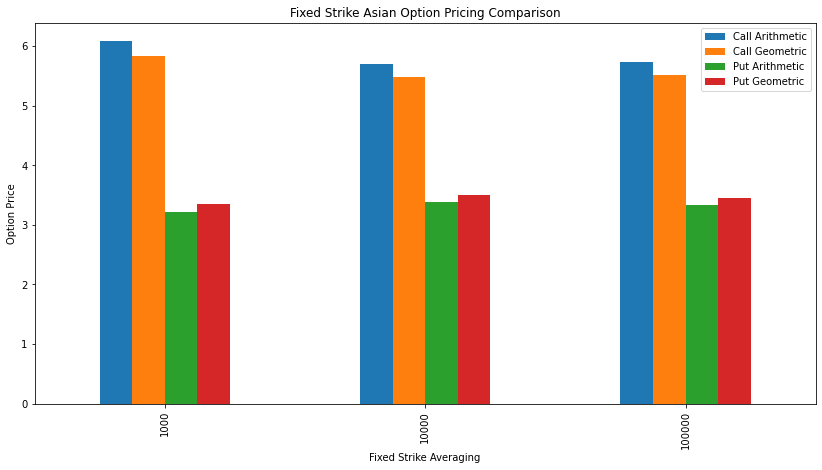

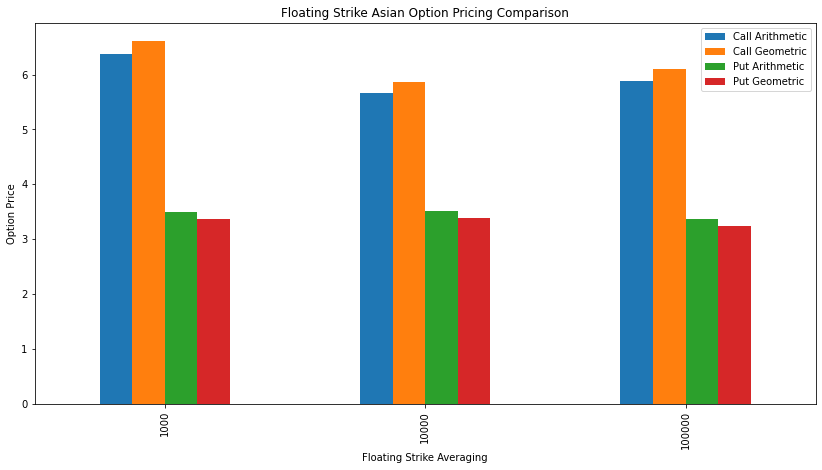

In [17]:
plot_option_pricing(fixed_strike_comparison_df, 'Fixed Strike Asian Option Pricing Comparison')
plot_option_pricing(floating_strike_comparison_df, 'Floating Strike Asian Option Pricing Comparison')


Above are plots for the results of our analysis on the pricing of both fived and floating Asian options.

The main difference between the two types of options is the relative prices of calls and puts within each method. Arithmetic averages tend to give higher call option prices for fixed strike but lower for floating strike when compared to geometric averages. Also, price differences between the arithmetic and geometric averages decrease as the number of paths increases. This suggests that the Monte Carlo estimates are stabilizing and converging to a more accurate value as the sample size grows.

### Varying Volatility

In [18]:
def compare_fixed_strike_asian_options_by_volatility(volatility_list, num_paths):
    results = {
        'Volatility': volatility_list,
        'Call Arithmetic': [],
        'Call Geometric': [],
        'Put Arithmetic': [],
        'Put Geometric': []
    }

    for sigma in volatility_list:
        paths = simulate_euler_method(S0, E, r, sigma, T, dt, num_paths)
        arith_call, arith_put = asian_option_arithmetic(paths, r, T, E)
        geom_call, geom_put = asian_option_geometric(paths, r, T, E)
        
        results['Call Arithmetic'].append(arith_call)
        results['Call Geometric'].append(geom_call)
        results['Put Arithmetic'].append(arith_put)
        results['Put Geometric'].append(geom_put)

    return results


In [19]:
volatility_list = [0.1, 0.2, 0.3, 0.4, 0.5]  # volatilities to analyze
num_paths = 10000  # Fixed number of simulation paths for each volatility level
fixed_strike_volatility_results = compare_fixed_strike_asian_options_by_volatility(volatility_list, num_paths)

fixed_strike_volatility_df = pd.DataFrame(fixed_strike_volatility_results)

In [20]:
fixed_strike_volatility_df

,Volatility,Call Arithmetic,Call Geometric,Put Arithmetic,Put Geometric
0,0.1,3.604241,3.536161,1.240687,1.263300
1,0.2,5.697468,5.485118,3.386409,3.508046
2,0.3,7.854130,7.412369,5.593368,5.890550
3,0.4,10.018538,9.259797,7.805519,8.350515
4,0.5,12.180703,11.018410,10.012381,10.875978


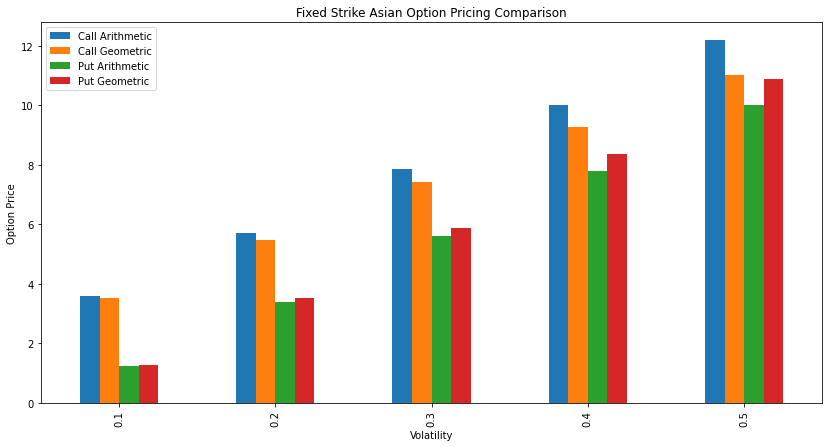

In [21]:
plot_option_pricing(fixed_strike_volatility_df, 'Fixed Strike Asian Option Pricing Comparison')

The above table and bar chart show the impact of volatility on the pricing of fixed-strike Asian options using both arithmetic and geometric averaging methods. As volatility increases from 0.10 to 0.50, the price of both call and put options also increases, which is consistent with the fundamental option pricing theory — higher volatility leads to higher option prices due to the greater uncertainty and potential for movement in the underlying asset's price. The trend in the chart underscores the principle that options become more valuable as the uncertainty (volatility) of the underlying asset increases, and this is true regardless of the averaging method used.

## Lookback Option

A Lookback option is a type of exotic option that allows the holder to "look back" over the life of the option and then to exercise based on the optimal value of the underlying asset. This means that the payoff depends on the maximum or minimum asset price achieved during the entire life of the option.

Floating Lookback Options:

The payoff is the difference between the highest price reached by the underlying asset during the option's life and the price of the underlying asset at the option's expiration.
$$ \text{Payoff} = \max(S_T - S_{\text{min}}, 0) $$
where $S_{\text{min}}$ is the minimum price the underlying reached during the life of the option, and $S_T$ is the price of the underlying at maturity. (Paul Wilmott (2007), Paul Wilmott introduces Quantitative Finance)

Floating Lookback Put Option:
The payoff is the difference between the price of the underlying asset at the option's expiration and the lowest price reached by the underlying asset during the option's life.
$$ \text{Payoff} = \max(S_{\text{max}} - S_T, 0) $$
where $S_{\text{max}}$ is the minimum price the underlying reached during the life of the option, and $S_T$ is the price of the underlying at maturity.

Fixed Lookback Options:


The payoff is the difference between the highest price reached by the underlying asset during the option's life and the fixed strike price.
$$ \text{Payoff} = \max(S_{\text{max}} - K, 0) $$
where $S_{\text{max}}$ is the maximum price the underlying reached during the life of the option, and $K$ is the fixed strike price.

Fixed Lookback Put Option:
The payoff is the difference between the fixed strike price and the lowest price reached by the underlying asset during the option's life.
$$ \text{Payoff} = \max(K - S_{\text{min}}, 0) $$
where $S_{\text{min}}$ is the minimum price the underlying reached during the life of the option, and $K$ is the fixed strike price.


##### Floating Strike Lookback Option

In [22]:
def floaing_lookback_option(simulated_paths, r, T):


    # Find the maximum and minimum price of the asset over each path
    max_prices = np.max(simulated_paths, axis=0)
    min_prices = np.min(simulated_paths, axis=0)
    
    # Calculate payoffs for lookback call and put options
    lookback_call_payoffs = simulated_paths[-1, :] - min_prices  # Holder can buy at the minimum price
    lookback_put_payoffs = max_prices - simulated_paths[-1, :]   # Holder can sell at the maximum price


    # Payoffs cannot be negative, so we take the maximum of zero and the payoffs
    lookback_call_payoffs = np.maximum(lookback_call_payoffs, 0)
    lookback_put_payoffs = np.maximum(lookback_put_payoffs, 0)

    # Discount the expected payoffs back to present value
    discounted_call_payoffs = np.exp(-r * T) * lookback_call_payoffs
    discounted_put_payoffs = np.exp(-r * T) * lookback_put_payoffs

    # The values of the options are the averages of the discounted payoffs
    lookback_call_value = np.mean(discounted_call_payoffs)
    lookback_put_value = np.mean(discounted_put_payoffs)

    return lookback_call_value, lookback_put_value



In [23]:
# Define the function to compare lookback options for different numbers of paths
def compare_lookback_options(num_paths_list):
    results = {
        'Simulations': num_paths_list,
        'Floating Lookback Call': [],
        'Floating Lookback Put': []
    }
    
    for num_paths in num_paths_list:
        paths = simulate_euler_method(S0, E, r, sigma, T, dt, num_paths)
        call_value, put_value = floaing_lookback_option(paths, r, T)
        
        results['Floating Lookback Call'].append(call_value)
        results['Floating Lookback Put'].append(put_value)
        
    return pd.DataFrame(results)

# Use the earlier specified path counts: 1,000, 10,000, and 100,000
floating_lookback_comparison_df = compare_lookback_options([1000, 10000, 100000])
floating_lookback_comparison_df

,Simulations,Floating Lookback Call,Floating Lookback Put
0,1000,17.413615,13.331255
1,10000,16.280912,13.721186
2,100000,16.684637,13.413459


The table shows the pricing results for floating strike lookback call and put options at different simulation levels. As the number of simulations increases from 1,000 to 100,000, the lookback call option prices decrease slightly, indicating that the price estimates are converging with more simulations. 

#### Fixed Strike

In [24]:
def fixed_lookback_option(simulated_paths, E, r, T):

    # Find the maximum and minimum price of the asset over each path
    max_prices = np.max(simulated_paths, axis=0)
    min_prices = np.min(simulated_paths, axis=0)

    # Calculate payoffs for fixed lookback call and put options
    fixed_lookback_call_payoffs = np.maximum(max_prices - E, 0)
    fixed_lookback_put_payoffs = np.maximum(E - min_prices, 0)

    # Discount the expected payoffs back to present value
    discounted_call_payoffs = np.exp(-r * T) * fixed_lookback_call_payoffs
    discounted_put_payoffs = np.exp(-r * T) * fixed_lookback_put_payoffs

    # The values of the options are the averages of the discounted payoffs
    fixed_lookback_call_value = np.mean(discounted_call_payoffs)
    fixed_lookback_put_value = np.mean(discounted_put_payoffs)

    return fixed_lookback_call_value, fixed_lookback_put_value

In [25]:
def compare_fixed_lookback_options(num_paths_list, E):
    results = {
        'Simulations': num_paths_list,
        'Fixed Lookback Call': [],
        'Fixed Lookback Put': []
    }
    
    for num_paths in num_paths_list:
        # Simulate the paths
        S = np.zeros((ts + 1, num_paths))
        S[0] = S0
        for t in range(ts):
            W = np.random.standard_normal(num_paths)
            S[t + 1] = S[t] * (1 + r * dt + sigma * np.sqrt(dt) * W)
        
        # Calculate the option prices
        call_value, put_value = fixed_lookback_option(S, E, r, T)
        results['Fixed Lookback Call'].append(call_value)
        results['Fixed Lookback Put'].append(put_value)
    
    return pd.DataFrame(results)



In [26]:
# Run the analysis for fixed strike lookback options
fixed_lookback_comparison_df = compare_fixed_lookback_options([1000, 10000, 100000], E)


In [27]:
fixed_lookback_comparison_df


,Simulations,Fixed Lookback Call,Fixed Lookback Put
0,1000,18.332035,11.598887
1,10000,18.278959,11.712030
2,100000,18.344913,11.740518


The results show a comparison of fixed strike lookback option prices for call and put options over different numbers of simulations: 1,000, 10,000, and 100,000. As the number of simulations increases, the price of the fixed lookback call option shows a slight increase, while the price of the fixed lookback put option shows a moderate increase.

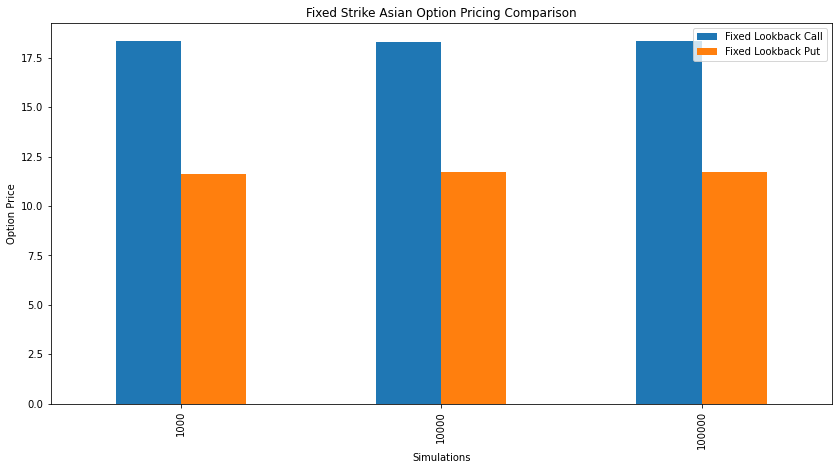

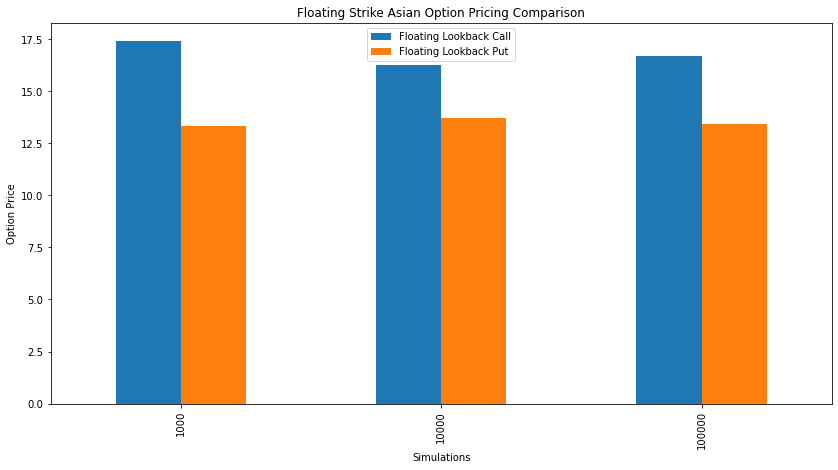

In [28]:
plot_option_pricing(fixed_lookback_comparison_df, 'Fixed Strike Asian Option Pricing Comparison')
plot_option_pricing(floating_lookback_comparison_df, 'Floating Strike Asian Option Pricing Comparison')

In both charts, the prices for lookback calls and puts are relatively stable across different simulation counts, indicating robustness in the Monte Carlo estimation method. However, the fixed strike options are priced higher than the floating strike options, which may reflect the additional value that comes from knowing the strike price in advance. Conversely, fixed strike lookback puts are cheaper compared to their floating strike counterparts. This pricing reflects market conventions where the certainty of a fixed strike in calls adds value, especially in rising markets, while for puts, the flexibility of a floating strike can be more valuable in falling markets, as it adapts to the asset's price movements.The trend in price changes as the simulation count increases is more pronounced in the fixed strike options, where there is a slight uptick in value, especially for the calls, compared to the more stable prices of the floating strike options. Also, the prices for both fixed and floating lookback calls and puts seem to stabilize as the number of simulations increases as the model converges on a true value which is similar to the Asian options.

##### Varying Volatility

In [29]:
def compare_fixed_lookback_options_by_volatility(volatility_list, num_paths, S0, E, r, T, dt):
    results = {
        'Volatility': volatility_list,
        'Lookback Call': [],
        'Lookback Put': []
    }
    
    for sigma in volatility_list:
        # Simulate the paths using the given volatility
        paths = simulate_euler_method(S0, E, r, sigma, T, dt, num_paths)
        
        # Calculate the option prices for lookback call and put
        lookback_call, lookback_put = fixed_lookback_option(paths, E, r, T)
        
        # Store the results
        results['Lookback Call'].append(lookback_call)
        results['Lookback Put'].append(lookback_put)
    
    return pd.DataFrame(results)


In [30]:
volatility_list = [0.1, 0.2, 0.3, 0.4, 0.5]  #volatilities to analyze
num_paths = 10000  # Number of paths for the simulation
S0 = 100  # Starting stock price
E = 100  # Strike price for the lookback option
r = 0.05  # Risk-free interest rate
T = 1  # Time to maturity
dt = 1/252  # Time increment for the simulation

# Run the comparison function
fixed_lookback_volatility_df = compare_fixed_lookback_options_by_volatility(volatility_list, 
num_paths, S0, E, r, T, dt)

fixed_lookback_volatility_df

,Volatility,Lookback Call,Lookback Put
0,0.1,10.314809,5.126568
1,0.2,18.180275,11.821824
2,0.3,26.614594,18.225293
3,0.4,35.554461,24.261883
4,0.5,44.995534,29.932210


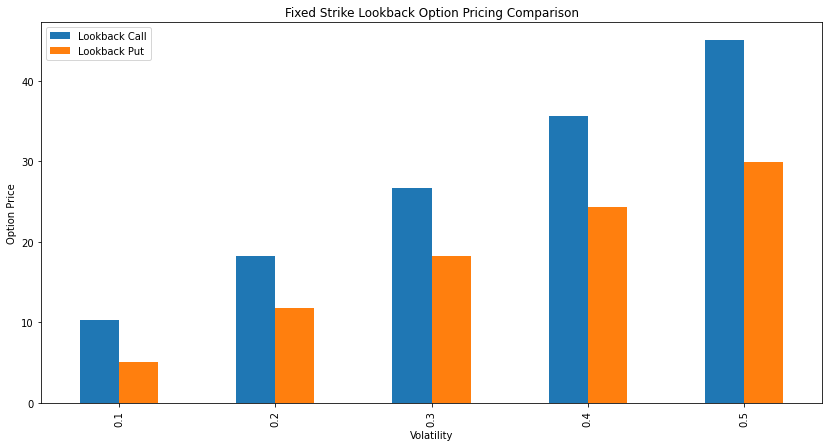

In [31]:
plot_option_pricing(fixed_lookback_volatility_df, 'Fixed Strike Lookback Option Pricing Comparison')

The bar chart above shows how the prices of fixed strike lookback calls and puts change with volatility. Both calls and puts increase in price as volatility rises, a pattern consistent with option pricing theory. Higher volatility leads to greater potential for beneficial price movements, thereby increasing the value of the option. This is consistnet with what we have seen prior.

#### Asian and Lookback options vs Vanilla

Lets see how the diiferent type of options compare against each other with regards to pricing.

In [32]:
# Function to calculate vanilla
def european_option(simulated_euler_paths, r, T, E):

    S = simulated_euler_paths
    vanilla_call_payoff = np.exp(-r*T) * np.mean(np.maximum(0, S[-1]-E))
    vanilla_put_payoff = np.exp(-r*T) * np.mean(np.maximum(0, E-S[-1]))


    return vanilla_call_payoff, vanilla_put_payoff

In [33]:
european_option(simulated_euler_paths, r, T, E)

(10.18031688467903, 5.721228129700731)

In [34]:
# Calculate the prices for the Asian and European options
asian_call_price, asian_put_price = asian_option_arithmetic(simulated_euler_paths, r, T, E)
lookback_call, lookback_put = fixed_lookback_option(simulated_euler_paths, E, r, T)
european_call_price, european_put_price = european_option(simulated_euler_paths, r, T, E)

In [35]:
# Construct the comparison table
comparison_data = {
    'Option Type': ['Asian Call', 'Asian Put', 'Lookback Call', 'Lookback Put', 'European Call', 'European Put'],
    'Price': [asian_call_price, asian_put_price,lookback_call, lookback_put, european_call_price, european_put_price]
}

comparison_df = pd.DataFrame(comparison_data)

In [36]:
comparison_df

,Option Type,Price
0,Asian Call,5.697468
1,Asian Put,3.386409
2,Lookback Call,18.180275
3,Lookback Put,11.821824
4,European Call,10.180317
5,European Put,5.721228


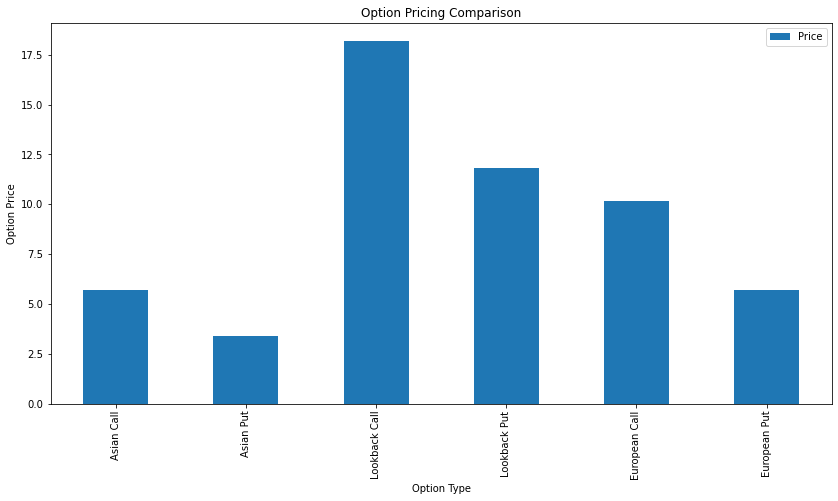

In [37]:
plot_option_pricing(comparison_df, 'Option Pricing Comparison')

The chart shows prices for different option types with Lookback options being the most expensive due to their flexible payoff structure, allowing the holder to exercise at the most favorable historical price. Asian options are less expensive because their average price mechanism reduces the impact of price volatility. European options, which can only be exercised at expiration, are priced in between, reflecting a balance of risk and potential payoff without the additional features of the exotic options.

# Conclusion 

In this report, the Euler-Maruyama method Monte Carlo simulation technique is explored and implemented for Asian and Lookback option pricing. The project aimed to price various types of exotic options, specifically Asian and Lookback options, to understand the valuation of financial instruments that have complex features beyond standard European options. Exotic options, due to their path-dependent characteristics and non-standard payoff profiles, present a more complex valuation challenge that often cannot be solved with closed-form solutions like the Black-Scholes model for European options.

Euler-Maruyama Method:
To tackle this problem, the Euler-Maruyama method was employed. This is a numerical approach for solving stochastic differential equations which underpin the asset price dynamics in the Black-Scholes framework. 

Option Variations and Pricing:
For Asian options, we discussed both averaging methods (arithmetic vs. geometric) and strike scheme (fixed strike vs. floating strike). Similarily, for looback options we analyse both Fixed and Floating Variatins. 

Comparative Analysis: For each option variation we did a comparative analysis.

- Price Stabilization with Simulation Size: There was a clear pattern across all options that price estimates stabilized with a larger number of simulations, highlighting the Monte Carlo method's robustness in providing accurate estimates.
- Sensitivity to Volatility: Lookback options displayed a significant increase in price with rising volatility, reflecting their greater sensitivity to extreme asset price movements, compared to Asian options.
- Valuation Hierarchy: The valuation hierarchy was consistent across different types of options, with lookback calls being the most expensive due to their beneficial exercise feature, followed by lookback puts, European calls and puts, and Asian calls and puts.

Possible ways to improve:
- Use Variance Reduction Techniques.
- Increase number of simulations. 
-Validate with Market Data.

The project successfully applied the Monte Carlo simulation using the Euler-Maruyama method to price exotic options, providing valuable insights into the pricing dynamics of path-dependent options. It illustrated the significant impact of averaging methods and the lookback feature on option valuation, the importance of volatility, and the convergence properties of Monte Carlo estimates. These findings are critical for practitioners and academics interested in the complex field of financial derivatives pricing.


# References
Hilpisch, Y. (2015), Python for Finance, 2nd Edition, O'Reilly Media, Inc.

Hilpisch, Y. (2015). Derivatives Analytics with Python. John Wiley & Sons Ltd.

Wilmott, P. (2006). Paul Wilmott on Quantitative Finance Volume 3. John

Wilmott, P. (2007). Paul Wilmott introduces Quantitative Finance. John Wiley & Sons Ltd.